Работа с API Яндекс метрики

In [7]:
# пример работы с Яндекс метрикой(выгружаем данные о посещениях по дням)
import pandas as pd
import requests
import json


# Base url to service
url = 'https://api-metrika.yandex.net/stat/v1/data?'

# &-separated parameters of query in a form of name=value, taken from the metrica site
visits = 'metrics=ym:s:visits&dimensions=ym:s:date&dimensions=ym:s:isRobot&id=44147844' # конструируем ссылку сами
url = url + visits

# Get json of response
query = requests.get(url)
json_data = json.loads(query.text)


# Conversion of obtained json to dataframe
visits_data = pd.DataFrame([(
                             i['dimensions'][0]['name'],
                             i['dimensions'][1]['name'],
                             i['metrics'][0]) for i in json_data['data']], 
                           columns=['date', 'user_type', 'visits'])

In [8]:
visits_data

,date,user_type,visits
0,2023-02-27,People,501.0
1,2023-02-28,People,468.0
2,2023-02-22,People,386.0
3,2023-02-23,People,378.0
4,2023-02-24,People,378.0
5,2023-02-25,People,335.0
6,2023-02-26,People,328.0
7,2023-02-27,Robots,33.0
8,2023-02-22,Robots,24.0
9,2023-02-23,Robots,22.0


In [12]:
import seaborn as sns

In [13]:
df = pd.read_csv('C:/Users/1/JupyterProjects/Karpov_courses_lessons_and_projects/module_python/all_data/step_1_lesson_7.csv')

In [14]:
df

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0
5,2020-06-17,Robots,138.0


Для начала, давайте посмотрим на распределение посещений сайта по дням.

<AxesSubplot:xlabel='date', ylabel='visits'>

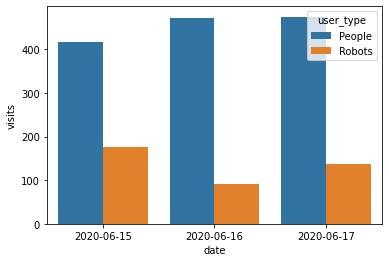

In [15]:
sns.barplot(data=df, x='date', y='visits', hue='user_type')

In [16]:
# dimensions=ym:s:browser + filter 2020-06-15
df = pd.read_csv('C:/Users/1/JupyterProjects/Karpov_courses_lessons_and_projects/module_python/all_data/step_2_lesson_7.csv')

In [18]:
df

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0
5,2020-06-15,Opera,16.0
6,2020-06-15,Mobile Safari,16.0
7,2020-06-15,Samsung Internet,9.0
8,2020-06-15,Edge,5.0
9,2020-06-15,UCWEB,4.0


Определим процент посещений сайта Яндекс.Метрики с бразузера Google Chrome.

In [19]:
round(df.query('browser == "Google Chrome"').visits * 100 / df.visits.sum())

0    60.0
Name: visits, dtype: float64

In [21]:
df = pd.read_csv('C:/Users/1/JupyterProjects/Karpov_courses_lessons_and_projects/module_python/all_data/step_3_lesson_7.csv')

In [22]:
df

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0
5,2020-06-15,Firefox,People,27.0
6,2020-06-15,Safari,Robots,22.0
7,2020-06-15,Safari,People,19.0
8,2020-06-15,Mobile Safari,People,15.0
9,2020-06-15,Opera,People,11.0


Давайте выясним, с какого браузера приходит больше всего ботов.

In [29]:
df['total_per_browser'] = df.groupby('browser').visits.transform('sum') # оконная функция

In [32]:
df['bot_percentage'] = df.query('user_type == "Robots"')['visits'] * 100 / df['total_per_browser']

In [34]:
df.query('user_type == "Robots"')

,date,browser,user_type,visits,total_per_browser,bot_percentage
1,2020-06-15,Google Chrome,Robots,104.0,354.0,29.378531
3,2020-06-15,Firefox,Robots,31.0,58.0,53.448276
6,2020-06-15,Safari,Robots,22.0,41.0,53.658537
11,2020-06-15,Yandex Browser,Robots,7.0,54.0,12.962963
12,2020-06-15,Opera,Robots,5.0,16.0,31.250000
13,2020-06-15,UCWEB,Robots,4.0,4.0,100.000000
15,2020-06-15,Mobile Safari,Robots,1.0,16.0,6.250000
18,2020-06-15,Chromium,Robots,1.0,2.0,50.000000
21,2020-06-15,Edge,Robots,1.0,5.0,20.000000
23,2020-06-15,Samsung Internet,Robots,1.0,9.0,11.111111


In [35]:
df = pd.read_csv('C:/Users/1/JupyterProjects/Karpov_courses_lessons_and_projects/module_python/all_data/step_4_lesson_7.csv')

In [36]:
df

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0
5,2020-06-15,Firefox,People,27.0
6,2020-06-15,Safari,Robots,22.0
7,2020-06-15,Safari,People,19.0
8,2020-06-15,Mobile Safari,People,15.0
9,2020-06-15,Opera,People,11.0


Создадим колонку с метрикой доли заходов на сайт для каждого из этих разрезов.

In [54]:
df['percentage_of_total'] = round(df['visits'] * 100 / df.visits.sum(), 1)

In [55]:
df

,date,browser,user_type,visits,percentage_of_total
0,2020-06-15,Google Chrome,People,250.0,42.1
1,2020-06-15,Google Chrome,Robots,104.0,17.5
2,2020-06-15,Yandex Browser,People,47.0,7.9
3,2020-06-15,Firefox,Robots,31.0,5.2
4,2020-06-15,Chrome Mobile,People,31.0,5.2
5,2020-06-15,Firefox,People,27.0,4.5
6,2020-06-15,Safari,Robots,22.0,3.7
7,2020-06-15,Safari,People,19.0,3.2
8,2020-06-15,Mobile Safari,People,15.0,2.5
9,2020-06-15,Opera,People,11.0,1.9


Создадим google spreadsheet и загрузим туда данную таблицу

In [45]:
import gspread
from df2gspread import df2gspread as d2g
from oauth2client.service_account import ServiceAccountCredentials


scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']


my_mail = 'mihail.ru02@gmail.com'
path_to_credentials = 'C:/Users/1/Downloads/my-project-first-377009-c256a91990f3.json'


# Authorization
credentials = ServiceAccountCredentials.from_json_keyfile_name(path_to_credentials, scope)
gs = gspread.authorize(credentials)


#### Создание своей таблицы

# Create empty table
table_name = 'A new spreadsheet'

sheet = gs.create(table_name)


# Make it visible to other guys
sheet.share(my_mail, perm_type='user', role='writer')

<Response [200]>

In [46]:

# Looks like spreadsheet should be already present at the dist (so, run code in create table section)
sheet = 'Master'
d2g.upload(df, table_name, sheet, credentials=credentials, row_names=True)

<Worksheet 'Master' id:532495092>

А теперь отправим ссылку на таблицу себе в личку

In [50]:
import vk_api
import random
token = 'vk1.a.VWsUsTsf9q9FY8tweQlpcNf4R4R2nETV4m7q3fVUtFrUZvfkEYdGetTC_w0Rl-tkOjEHN4aTtAFyWTjbk6bXj0RzQE9EcJjPJDfTWiG1Jq8RejCgPj3494YgcfnH1I9IabVtiyYNcvQCXGjC7luf2hWTF2KP2RGCpfNUksRok7rcdM8WWIP_1-KFL7miHxknX0iXj0YCYOaJb5sevc-kiQ'
my_id = 320826413 

vk_session = vk_api.VkApi(token=token)

vk = vk_session.get_api()

vk.messages.send(
    user_id=my_id,
    random_id=random.randint(1, 2 ** 31),
    message="https://docs.google.com/spreadsheets/d/1FHkMKMfUKGkCta_8HyK0aOkOjHadWZRz5wSQmVKuThM/edit?usp=sharing")

7

In [56]:
from io import BytesIO
import requests
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content

df_2 = pd.read_csv(BytesIO(data))

In [65]:
df_2

,date,browser,user_type,users
0,2020-06-15,Google Chrome,People,240.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,44.0
3,2020-06-15,Chrome Mobile,People,30.0
4,2020-06-15,Firefox,Robots,29.0
5,2020-06-15,Firefox,People,26.0
6,2020-06-15,Safari,Robots,20.0
7,2020-06-15,Safari,People,17.0
8,2020-06-15,Mobile Safari,People,14.0
9,2020-06-15,Opera,People,10.0


Прочитаем дополнительные данные из Google SpreadSheet, объединим нашу таблицу из предыдущего шага с таблицей аналитика и посчитаем количество визитов на человека (отношение visits к users) в разрезе по браузеру и значениям Robots/People.

In [78]:
df = df.merge(df_2.loc[:, 'browser':], how='inner', on=['browser', 'user_type'])

In [79]:
df

,date,browser,user_type,visits,users
0,2020-06-15,Google Chrome,People,250.0,240.0
1,2020-06-15,Google Chrome,Robots,104.0,104.0
2,2020-06-15,Yandex Browser,People,47.0,44.0
3,2020-06-15,Firefox,Robots,31.0,29.0
4,2020-06-15,Chrome Mobile,People,31.0,30.0
5,2020-06-15,Firefox,People,27.0,26.0
6,2020-06-15,Safari,Robots,22.0,20.0
7,2020-06-15,Safari,People,19.0,17.0
8,2020-06-15,Mobile Safari,People,15.0,14.0
9,2020-06-15,Opera,People,11.0,10.0


In [80]:
df['visit_per_user'] = round(df.visits / df.users)

In [81]:
df

,date,browser,user_type,visits,users,visit_per_user
0,2020-06-15,Google Chrome,People,250.0,240.0,1.0
1,2020-06-15,Google Chrome,Robots,104.0,104.0,1.0
2,2020-06-15,Yandex Browser,People,47.0,44.0,1.0
3,2020-06-15,Firefox,Robots,31.0,29.0,1.0
4,2020-06-15,Chrome Mobile,People,31.0,30.0,1.0
5,2020-06-15,Firefox,People,27.0,26.0,1.0
6,2020-06-15,Safari,Robots,22.0,20.0,1.0
7,2020-06-15,Safari,People,19.0,17.0,1.0
8,2020-06-15,Mobile Safari,People,15.0,14.0,1.0
9,2020-06-15,Opera,People,11.0,10.0,1.0


Дополнительный проект. Работа с API https://metmuseum.github.io/

In [2]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Наша задача – найти все произведения, связанные с подсолнухами. Выполним поиск по слову "sunflowers".

In [3]:
r = requests.get('https://collectionapi.metmuseum.org/public/collection/v1/search?q=sunflowers')
res = r.json()

In [4]:
res

{'total': 89,
 'objectIDs': [436524,
  484935,
  437112,
  210191,
  431264,
  397949,
  656530,
  480725,
  486590,
  485308,
  375281,
  705155,
  11922,
  2032,
  343052,
  20141,
  347980,
  2019,
  208554,
  403496,
  360837,
  437115,
  207869,
  400581,
  423400,
  707887,
  223828,
  682927,
  57922,
  649813,
  79739,
  193938,
  339347,
  208218,
  437984,
  202228,
  436534,
  761604,
  437329,
  436252,
  363282,
  207753,
  822570,
  816522,
  487043,
  436580,
  437526,
  203893,
  367434,
  190739,
  423237,
  262423,
  839296,
  367817,
  822590,
  822589,
  13644,
  18362,
  820022,
  648617,
  892559,
  761731,
  814626,
  207967,
  626832,
  262430,
  262428,
  841928,
  707697,
  205386,
  262378,
  426804,
  633526,
  369073,
  747779,
  852414,
  427872,
  895564,
  436530,
  436535,
  436121,
  436529,
  724844,
  436144,
  437980,
  631808,
  834580,
  834585,
  834765]}

In [6]:
sunflower_ids = res['objectIDs']

In [7]:
sunflower_ids

[436524,
 484935,
 437112,
 210191,
 431264,
 397949,
 656530,
 480725,
 486590,
 485308,
 375281,
 705155,
 11922,
 2032,
 343052,
 20141,
 347980,
 2019,
 208554,
 403496,
 360837,
 437115,
 207869,
 400581,
 423400,
 707887,
 223828,
 682927,
 57922,
 649813,
 79739,
 193938,
 339347,
 208218,
 437984,
 202228,
 436534,
 761604,
 437329,
 436252,
 363282,
 207753,
 822570,
 816522,
 487043,
 436580,
 437526,
 203893,
 367434,
 190739,
 423237,
 262423,
 839296,
 367817,
 822590,
 822589,
 13644,
 18362,
 820022,
 648617,
 892559,
 761731,
 814626,
 207967,
 626832,
 262430,
 262428,
 841928,
 707697,
 205386,
 262378,
 426804,
 633526,
 369073,
 747779,
 852414,
 427872,
 895564,
 436530,
 436535,
 436121,
 436529,
 724844,
 436144,
 437980,
 631808,
 834580,
 834585,
 834765]

Выполним запрос для объекта 437980

In [9]:
r_test = requests.get(f'https://collectionapi.metmuseum.org/public/collection/v1/objects/437980')
obj_test = r_test.json()

In [10]:
obj_test['objectID']

437980

In [11]:
obj_test

{'objectID': 437980,
 'isHighlight': False,
 'accessionNumber': '49.30',
 'accessionYear': '1949',
 'isPublicDomain': True,
 'primaryImage': 'https://images.metmuseum.org/CRDImages/ep/original/DP130999.jpg',
 'primaryImageSmall': 'https://images.metmuseum.org/CRDImages/ep/web-large/DP130999.jpg',
 'additionalImages': [],
 'constituents': [{'constituentID': 161947,
   'role': 'Artist',
   'name': 'Vincent van Gogh',
   'constituentULAN_URL': 'http://vocab.getty.edu/page/ulan/500115588',
   'constituentWikidata_URL': 'https://www.wikidata.org/wiki/Q5582',
   'gender': ''}],
 'department': 'European Paintings',
 'objectName': 'Painting',
 'title': 'Cypresses',
 'culture': '',
 'period': '',
 'dynasty': '',
 'reign': '',
 'portfolio': '',
 'artistRole': 'Artist',
 'artistPrefix': '',
 'artistDisplayName': 'Vincent van Gogh',
 'artistDisplayBio': 'Dutch, Zundert 1853–1890 Auvers-sur-Oise',
 'artistSuffix': '',
 'artistAlphaSort': 'Gogh, Vincent van',
 'artistNationality': 'Dutch',
 'artistB

In [119]:
objectID = []
title = []
artistDisplayName = []
department = []
objectBeginDate = []
objectEndDate = []
period = []
objectName = []
culture = []

for index in sunflower_ids:
    test = requests.get(f'https://collectionapi.metmuseum.org/public/collection/v1/objects/{index}')
    obj_test = test.json()
    try:
        objectID.append(obj_test['objectID'])
        title.append(obj_test['title'])
        artistDisplayName.append(obj_test['artistDisplayName'])
        department.append(obj_test['department'])
        objectBeginDate.append(obj_test['objectBeginDate'])
        objectEndDate.append(obj_test['objectEndDate'])
        period.append(obj_test['period'])
        objectName.append(obj_test['objectName'])
        culture.append(obj_test['culture'])
    except:
        print('Ops')
df = pd.DataFrame({'objectID': objectID, 'title': title, 'artistDisplayName': artistDisplayName, 'department': department, \
                  'objectBeginDate': objectBeginDate, 'objectEndDate': objectEndDate, 'period': period, 'objectName': objectName, \
                  'culture': culture})   

Ops
Ops
Ops


In [124]:
df

,objectID,title,artistDisplayName,department,objectBeginDate,objectEndDate,period,objectName,culture
0,436524,Sunflowers,Vincent van Gogh,European Paintings,1887,1887,,Painting,
1,484935,Sunflowers,Edward McKnight Kauffer,Modern and Contemporary Art,1921,1921,,Painting,
2,437112,Bouquet of Sunflowers,Claude Monet,European Paintings,1881,1881,,Painting,
3,210191,Vase with sunflowers,Rozenburg Plateelfabriek,European Sculpture and Decorative Arts,1896,1896,,Vase,
4,431264,Sunflowers,Lily Converse,Drawings and Prints,1941,1941,,Print,
...,...,...,...,...,...,...,...,...,...
81,436144,James-Jacques-Joseph Tissot (1836–1902),Edgar Degas,European Paintings,1867,1868,,Painting,
82,437980,Cypresses,Vincent van Gogh,European Paintings,1889,1889,,Painting,
83,834580,"A Life in a Year–The Garden–Noon, from ""Pictur...",Arthur Boyd Houghton,Drawings and Prints,1866,1874,,Print,
84,834585,"A Life in a Year–The Garden–Noon, from ""Pictur...",Arthur Boyd Houghton,Drawings and Prints,1866,1874,,Print,


In [125]:
df.query('culture == "Japan"')

,objectID,title,artistDisplayName,department,objectBeginDate,objectEndDate,period,objectName,culture
29,57922,Incense box,,Asian Art,1700,1799,Edo period (1615–1868),Incense box,Japan


Теперь попробуем построить более сложный запрос с помощью секции "Search"!

In [126]:
r = requests.get('https://collectionapi.metmuseum.org/public/collection/v1/search?departmentId=6&q=cat')
cats = r.json()

In [128]:
cat_ids = cats['objectIDs']

In [135]:
objectID = []
title = []
artistDisplayName = []
department = []
objectBeginDate = []
objectEndDate = []
period = []
objectName = []
culture = []

for i in range(1000):
    test = requests.get(f'https://collectionapi.metmuseum.org/public/collection/v1/objects/{cat_ids[i]}')
    obj_test = test.json()
    try:
        objectID.append(obj_test['objectID'])
        title.append(obj_test['title'])
        artistDisplayName.append(obj_test['artistDisplayName'])
        department.append(obj_test['department'])
        objectBeginDate.append(obj_test['objectBeginDate'])
        objectEndDate.append(obj_test['objectEndDate'])
        period.append(obj_test['period'])
        objectName.append(obj_test['objectName'])
        culture.append(obj_test['culture'])
    except:
        print('Ops')
df = pd.DataFrame({'objectID': objectID, 'title': title, 'artistDisplayName': artistDisplayName, 'department': department, \
                  'objectBeginDate': objectBeginDate, 'objectEndDate': objectEndDate, 'period': period, 'objectName': objectName, \
                  'culture': culture})  

In [136]:
df

,objectID,title,artistDisplayName,department,objectBeginDate,objectEndDate,period,objectName,culture
0,49698,Cat,Zhang Yuguang,Asian Art,1900,1968,,Folding fan mounted as an album leaf,China
1,49470,Cat,Wang Li,Asian Art,1813,1879,Qing dynasty (1644–1911),Hanging scroll,China
2,53222,Musk Cat,Uto Gyoshi,Asian Art,1550,1599,Muromachi period (1392–1573),Hanging scroll,Japan
3,36221,Cat,Wang Yun,Asian Art,1900,1933,,Hanging scroll,China
4,60873,Burial Crown,,Asian Art,960,1279,Song dynasty (960–1279) or later,Burial crown,China
...,...,...,...,...,...,...,...,...,...
995,46968,Square Flask,,Asian Art,1700,1799,Edo period (1615–1868),Square flask,Japan
996,48870,Chinese Child Playing a Game of Go,,Asian Art,1767,1799,Edo period (1615–1868),Ceramic,Japan
997,41749,Water Jar for the Tea Ceremony with Seven Sage...,,Asian Art,1700,1799,Edo period (1615–1868),Water jar,Japan
998,41773,Chinese Children Playing a Game of Go,,Asian Art,1767,1799,Edo period (1615–1868),Ceramic,Japan


In [137]:
df.groupby('period').count().sort_values('objectID', ascending=False)

,objectID,title,artistDisplayName,department,objectBeginDate,objectEndDate,objectName,culture
period,,,,,,,,
Edo period (1615–1868),454,454,454,454,454,454,454,454
,108,108,108,108,108,108,108,108
Qing dynasty (1644–1911),62,62,62,62,62,62,62,62
Ming dynasty (1368–1644),33,33,33,33,33,33,33,33
Muromachi period (1392–1573),30,30,30,30,30,30,30,30
...,...,...,...,...,...,...,...,...
"Ming dynasty (1368–1644), Wanli period (1573–1620)",1,1,1,1,1,1,1,1
"Ming dynasty (1368–1644), Wanli mark and period (1573–1620)",1,1,1,1,1,1,1,1
"Ming dynasty (1368–1644), Tianqi period (1621–27)",1,1,1,1,1,1,1,1
